# Oemer - End-to-End OMR

Given a music score image, which can also be phone taken, this tool will parse and generate the result file in MusicXML format, which can be further edited easily with other tools such as Musescore.

In [ ]:
#@title Setup
#@markdown **Make sure to press "Enter" while installing musescore command line!**

%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen

!add-apt-repository ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get --yes install musescore3 libmagic-dev

!pip install oemer[gpu]

%load_ext autoreload
%autoreload 2

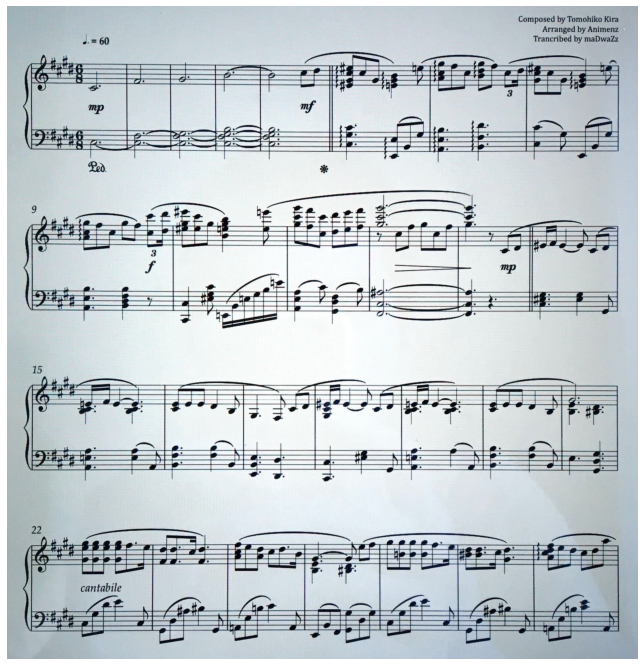

In [6]:
#@title Upload Image

%matplotlib inline

from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

ff = files.upload()
img_path = list(ff.keys())[0]
basename = img_path.replace(".jpg", "").replace(".png", "")

os.environ['img_path'] = img_path
os.environ['basename'] = basename

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

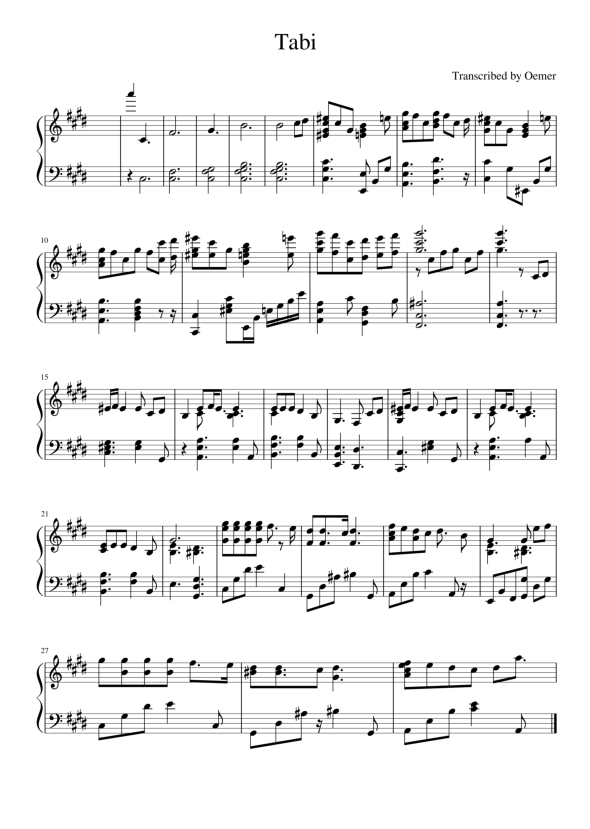

In [8]:
#@title Run Recoginition

%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen
#%env INFERENCE_WITH_TF=True

import IPython.display as dsp

!oemer "$img_path"

!musescore3 -o "${basename}.mp3" $basename.musicxml
!musescore3 -o "${basename}.png" $basename.musicxml


img = plt.imread(f"{basename}-1.png")
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(img)
plt.show()

dsp.display(dsp.Audio(f"{basename}.mp3"))